In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
import seaborn

In [5]:
saw3 = pd.read_csv("sa_weight.csv")

In [6]:
saw3.head()

,date,weight,fat,muscle
0,03.12.17,60.0,NaN,NaN
1,10.12.17,61.0,NaN,NaN
2,17.12.17,62.0,NaN,NaN
3,26.12.17,63.0,NaN,NaN
4,02.01.18,63.6,NaN,NaN


In [7]:
saw3.date = pd.to_datetime(saw3.date, format="%d.%m.%y")

In [8]:
saw3

,date,weight,fat,muscle
0,2017-12-03,60.0,NaN,NaN
1,2017-12-10,61.0,NaN,NaN
2,2017-12-17,62.0,NaN,NaN
3,2017-12-26,63.0,NaN,NaN
4,2018-01-02,63.6,NaN,NaN
...,...,...,...,...
68,2020-12-04,57.2,11.2,46.5
69,2020-12-12,57.2,10.9,46.6
70,2020-12-19,57.7,11.3,46.3
71,2020-12-26,57.2,11.1,46.5


Text(0, 0.5, 'Selehadins weight over the years')

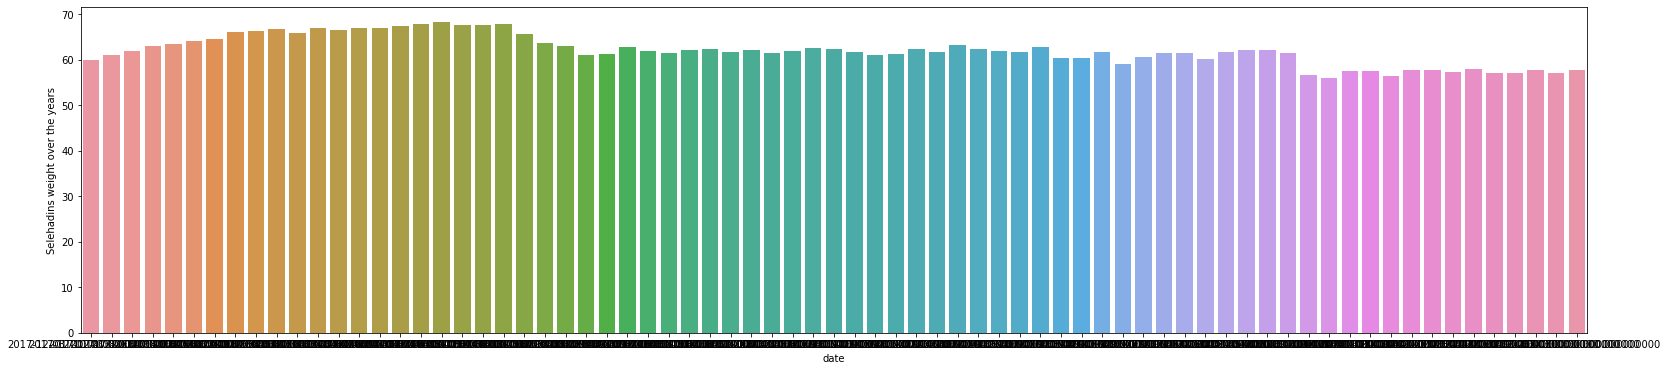

In [9]:
plt.figure(figsize=(27,6))
seaborn.barplot(x=saw3.date, y=saw3['weight'])
plt.ylabel("Selehadins weight over the years")

In [10]:
plt.figure(figsize=(7,16))
seaborn.heatmap(data=saw3.drop(['fat','muscle'],axis=1), annot=True)
plt.xlabel("weight")

TypeError: float() argument must be a string or a number, not 'Timestamp'

<Figure size 504x1152 with 0 Axes>

In [10]:
saw3['month'] = saw3['date'].dt.month
saw3['year'] = saw3['date'].dt.year
saw3.groupby([saw3["month"], saw3["year"]]).mean()

weight        fat     muscle
month year                                 
1     2018  63.900000        NaN        NaN
      2019  61.675000  14.325000  44.925000
      2021  57.700000  11.500000  46.300000
2     2018  65.975000        NaN        NaN
      2019  62.533333  14.900000  44.633333
      2020  62.100000  14.700000  44.700000
3     2018  66.650000        NaN        NaN
      2020  62.100000  14.900000  44.700000
4     2018  67.640000        NaN        NaN
      2019  61.800000  14.300000  45.000000
      2020  61.600000  14.400000  44.900000
5     2018  67.033333        NaN        NaN
      2019  62.800000  15.500000  44.600000
6     2018  63.400000        NaN        NaN
7     2019  60.500000  13.450000  45.400000
8     2018  61.200000  14.100000        NaN
      2019  61.800000  14.400000  44.900000
9     2018  62.100000  14.400000        NaN
      2019  59.950000  13.000000  45.600000
10    2018  62.066667  14.766667  45.000000
      2019  61.500000  14.800000  44.600000
      2020  56.840000  10.900000  46.600000
11    2018  61.850000  14.800000  44.650000
      2019  61.500000  14.400000  44.900000
      2020  57.675000  11.425000  46.350000
12    2017  61.500000        NaN        NaN
      2018  62.200000  15.200000  44.450000
      2019  61.050000  14.150000  45.050000
      2020  57.325000  11.125000  46.475000

In [39]:
 #saw5.index = saw5.index.rename(["month","year"], inplace=False)

In [11]:
saw4 = saw3.groupby([saw3["month"], saw3["year"]]).mean()

In [12]:
df2 = saw4.reset_index().pivot(columns='year',index='month',values='weight')

In [16]:
df2r = df2.iloc[::-1]

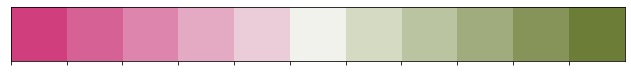

In [37]:
plt.title("Selehaddin's weight through the years")
seaborn.palplot(seaborn.diverging_palette(350, 100, n=11))

plt.show()

<AxesSubplot:title={'center':"Selehaddin's weight through the years"}, xlabel='year', ylabel='month'>

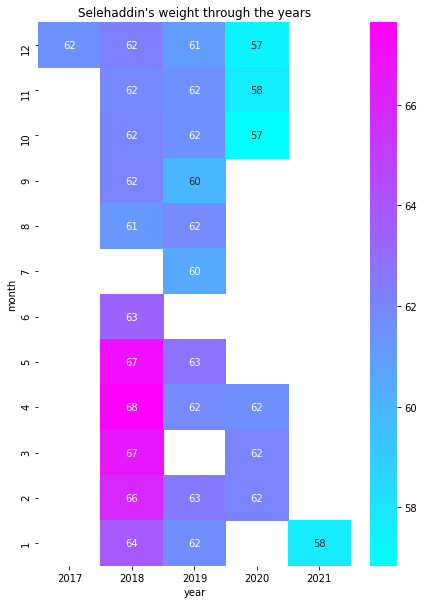

In [17]:
plt.figure(figsize=(7,10))
plt.title("Selehaddin's weight through the years")

seaborn.heatmap(df2r, cmap="cool", annot=True)

In [56]:
heatmap = saw5.groupby(["month","year"]).median()
heatmap = heatmap.drop(['fat','muscle'],axis=1)
heatmap

weight
month year           
1     2018  63.900000
      2019  61.675000
      2021  57.700000
2     2018  65.975000
      2019  62.533333
      2020  62.100000
3     2018  66.650000
      2020  62.100000
4     2018  67.640000
      2019  61.800000
      2020  61.600000
5     2018  67.033333
      2019  62.800000
6     2018  63.400000
7     2019  60.500000
8     2018  61.200000
      2019  61.800000
9     2018  62.100000
      2019  59.950000
10    2018  62.066667
      2019  61.500000
      2020  56.840000
11    2018  61.850000
      2019  61.500000
      2020  57.675000
12    2017  61.500000
      2018  62.200000
      2019  61.050000
      2020  57.325000

In [23]:
saw4.pivot(index="year", columns="month", values="weight")

KeyError: 'year'

<AxesSubplot:ylabel='month-year'>

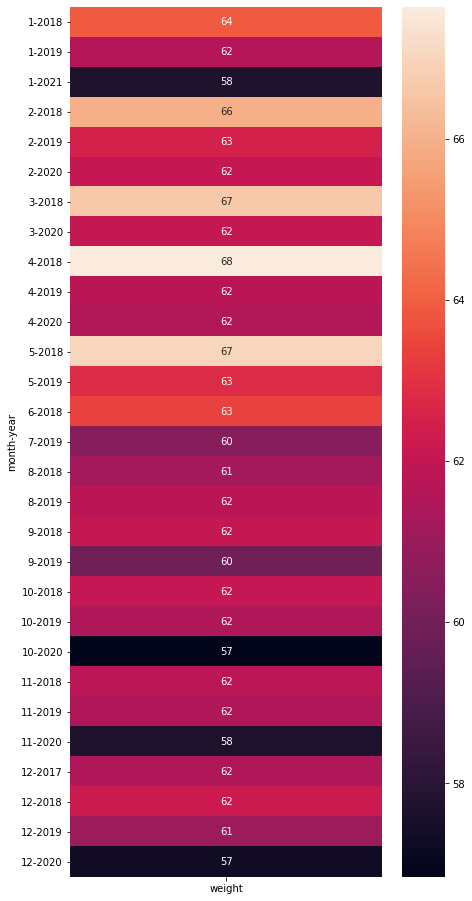

In [58]:
plt.figure(figsize=(7,16))
seaborn.heatmap(data=heatmap, annot=True)

In [60]:
heatmap

weight
month year           
1     2018  63.900000
      2019  61.675000
      2021  57.700000
2     2018  65.975000
      2019  62.533333
      2020  62.100000
3     2018  66.650000
      2020  62.100000
4     2018  67.640000
      2019  61.800000
      2020  61.600000
5     2018  67.033333
      2019  62.800000
6     2018  63.400000
7     2019  60.500000
8     2018  61.200000
      2019  61.800000
9     2018  62.100000
      2019  59.950000
10    2018  62.066667
      2019  61.500000
      2020  56.840000
11    2018  61.850000
      2019  61.500000
      2020  57.675000
12    2017  61.500000
      2018  62.200000
      2019  61.050000
      2020  57.325000

In [87]:
heatmap.index.get_level_values(1)

Int64Index([2018, 2019, 2021, 2018, 2019, 2020, 2018, 2020, 2018, 2019, 2020,
            2018, 2019, 2018, 2019, 2018, 2019, 2018, 2019, 2018, 2019, 2020,
            2018, 2019, 2020, 2017, 2018, 2019, 2020],
           dtype='int64', name='year')